# **Unsupervised Learning: AllLife Bank Customer Segmentation**
--------------------------------
## **Context** 
-------------------------------

**AllLife Bank wants to focus on its credit card customer base** in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. 

Another insight from the market research was that the customers perceive the support services of the bank poorly. Based on this, the operations team wants to upgrade the service delivery model, to ensure that customers' queries are resolved faster. The head of marketing and the head of delivery, both decide to reach out to the Data Science team for help.


----------------------------
## **Objective**
-----------------------------

**Our objective is to identify different segments in the existing customer base**, taking into account their spending patterns as well as past interactions with the bank.

--------------------------
## **About the data**
--------------------------

Data is available on customers of the bank with their credit limit, the total number of credit cards the customer has, and different channels through which the customer has contacted the bank for any queries. These different channels include visiting the bank, online, and through a call center.

- **Sl_no** - Customer Serial Number
- **Customer Key** - Customer identification
- **Avg_Credit_Limit**	- Average credit limit (currency is not specified, you can make an assumption around this)
- **Total_Credit_Cards** - Total number of credit cards 
- **Total_visits_bank**	- Total bank visits
- **Total_visits_online** - Total online visits
- **Total_calls_made** - Total calls made

## **Importing libraries and overview of the dataset**

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

# Importing PCA and t-SNE
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import copy
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score
from scipy.stats import zscore
from scipy.spatial.distance import cdist, pdist
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.cluster.hierarchy import average, complete, ward, fcluster
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn_extra.cluster import KMedoids



import warnings
warnings.filterwarnings("ignore")

### **Loading the data**

In [2]:
data = pd.read_excel("/Users/nylehamidi/Documents/MIT_Python/Elective Project/Credit Card Customer Data.xlsx")
data_copy = data

### **Data Overview**

- Observations
- Sanity checks




In [3]:
# let's take a quick look at the dataset
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
# let's take a deeper look at the individual componets in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [5]:
# let's find its dimentions
data.shape

(660, 7)

## **Data Preprocessing and Exploratory Data Analysis**

#### **Check the summary Statistics**

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


In [7]:
# let's check for duplicate rows
data.duplicated().sum()

0

In [8]:
# let's check how many missing values the dataset contains
data.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

**Observations:**<br>
- There are no missing values
<br>
- There are no duplicate entries 
<br>
- There are repeat values in customer keys, which is an identifier

In [9]:
data.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [10]:
# we can see that 'Customer Key' has 5 fewer unique entries than we expect
# each customer key should be unique
# thus, there should be 660 unique values in this column
data['Customer Key'].nunique()

655

In [11]:
# let's take a look at the rows that contain duplicate customer keys
data[data['Customer Key'].isin(data[data['Customer Key'].duplicated()]['Customer Key'].tolist())].sort_values('Customer Key')

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,49,37252,6000,4,0,2,8
432,433,37252,59000,6,2,1,2
4,5,47437,100000,6,0,12,3
332,333,47437,17000,7,3,1,0
411,412,50706,44000,4,5,0,2
541,542,50706,60000,7,5,2,2
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2
104,105,97935,17000,2,1,2,10
632,633,97935,187000,7,1,7,0


In [12]:
# since there is already an entry in the dataset that corresponds to a serial (Sl_No), 
# we'll use that as the index for the dataset
data = data.set_index(['Sl_No'])

In [13]:
# we can also drop 'Customer Key' as it adds no value to clustering
data = data.drop(columns = ["Customer Key"])

In [14]:
# we should see that the dataset is indexed by 'Sl_No'
# we should also no longer see column 'Customer Key'
data.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,
1,100000,2,1,1,0
2,50000,3,0,10,9
3,50000,7,1,3,4
4,30000,5,1,1,4
5,100000,6,0,12,3


In [15]:
# let's check that we still have the same number of entries since we did not drop any
# when we ran data.shape above, we found there are 660 entries
data.index.max()

660

**Observations:**<br>
- Rows with duplicated customer keys were different in all other aspect
<br>
- We can assume that there was an error in entering the customer key
<br>
- Going forward, Sl_No and Customer Key will not help us with our analysis so we dropped 'Customer Keys' and used Sl_No as the index for the dataset

In [16]:
# now that the dataset is cleaned up we can explore some basic statistical information
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


Avg_Credit_Limit
Skew : 2.2


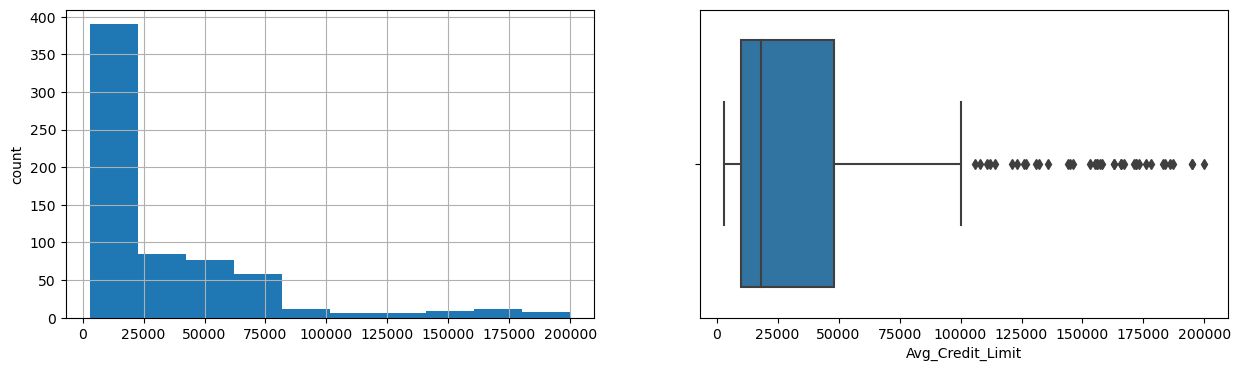

Total_Credit_Cards
Skew : 0.14


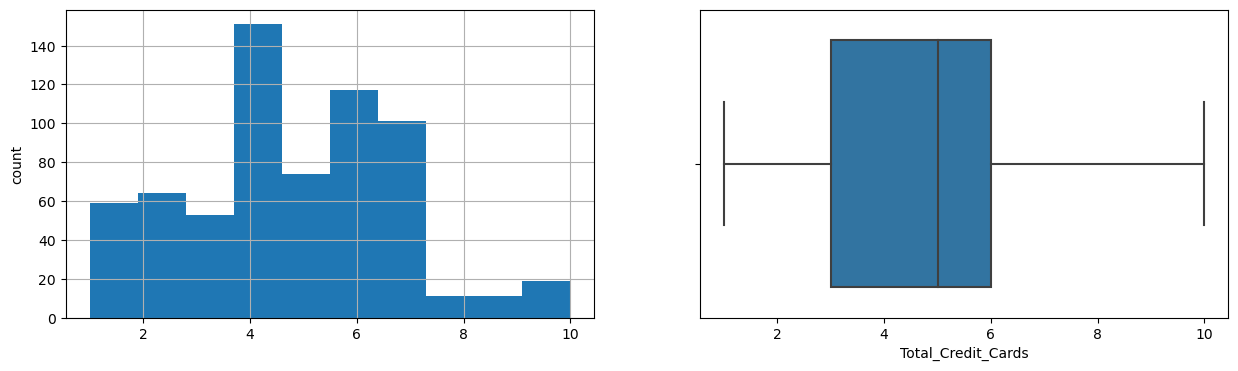

Total_visits_bank
Skew : 0.14


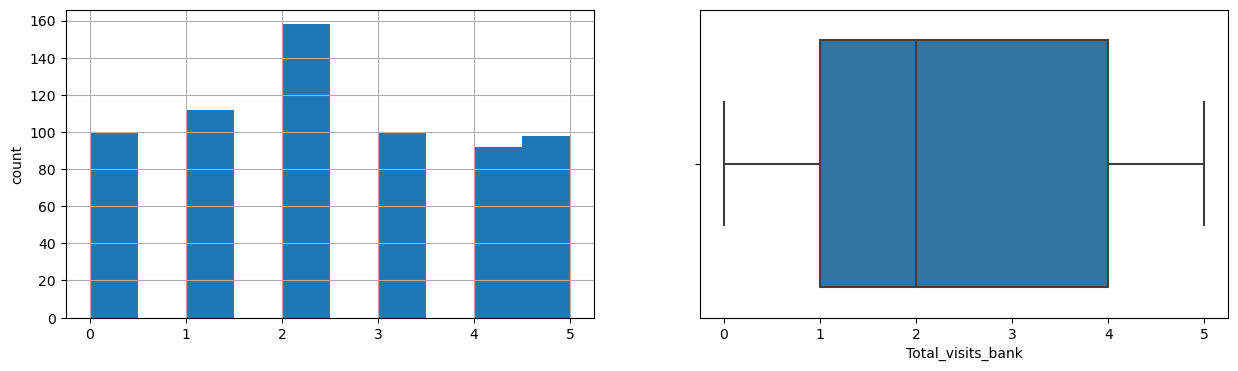

Total_visits_online
Skew : 2.23


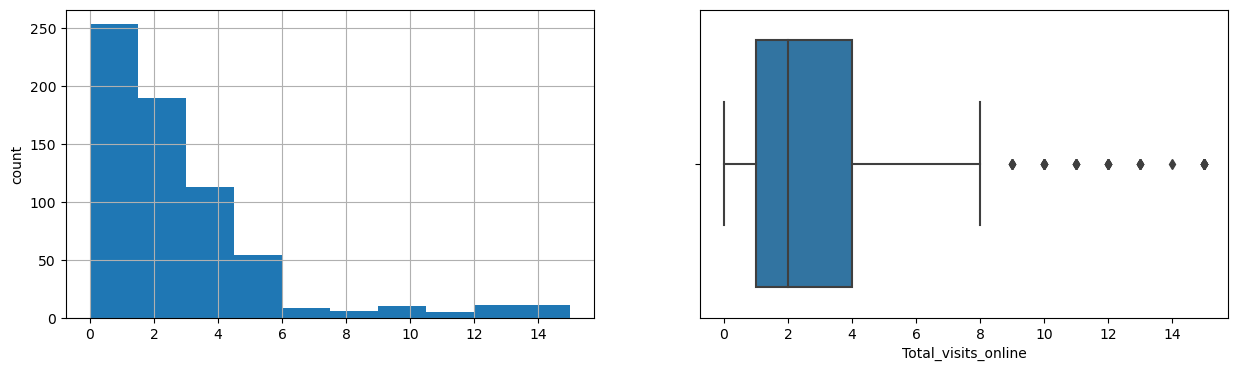

Total_calls_made
Skew : 0.66


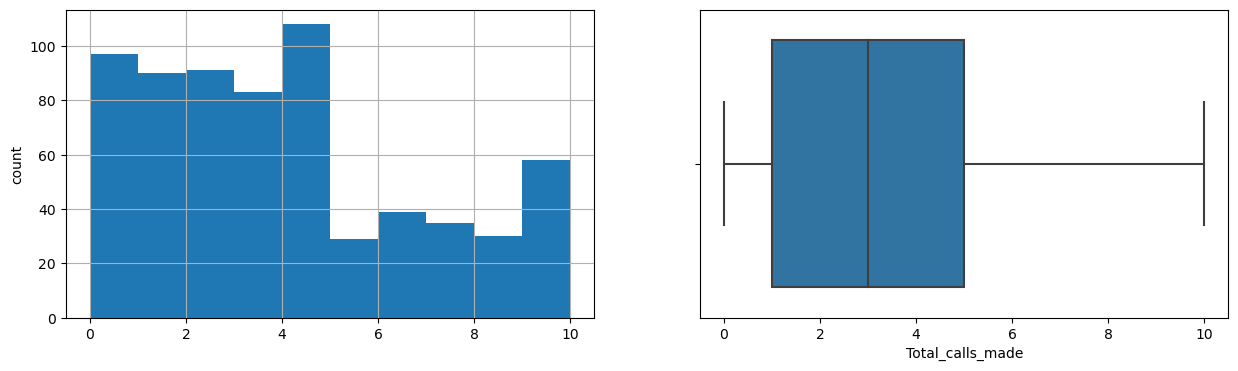

In [17]:
# let's plot univariate graphs
for col in data.columns:
     print(col)
     print('Skew :',round(data[col].skew(),2))
     plt.figure(figsize=(15,4))
     plt.subplot(1,2,1)
     data[col].hist()
     plt.ylabel('count')
     plt.subplot(1,2,2)
     sns.boxplot(x=data[col])
     plt.show()

In [18]:
# this will give us all the skews above in an organized column
data.skew()

Avg_Credit_Limit       2.202396
Total_Credit_Cards     0.144879
Total_visits_bank      0.141896
Total_visits_online    2.225607
Total_calls_made       0.658905
dtype: float64

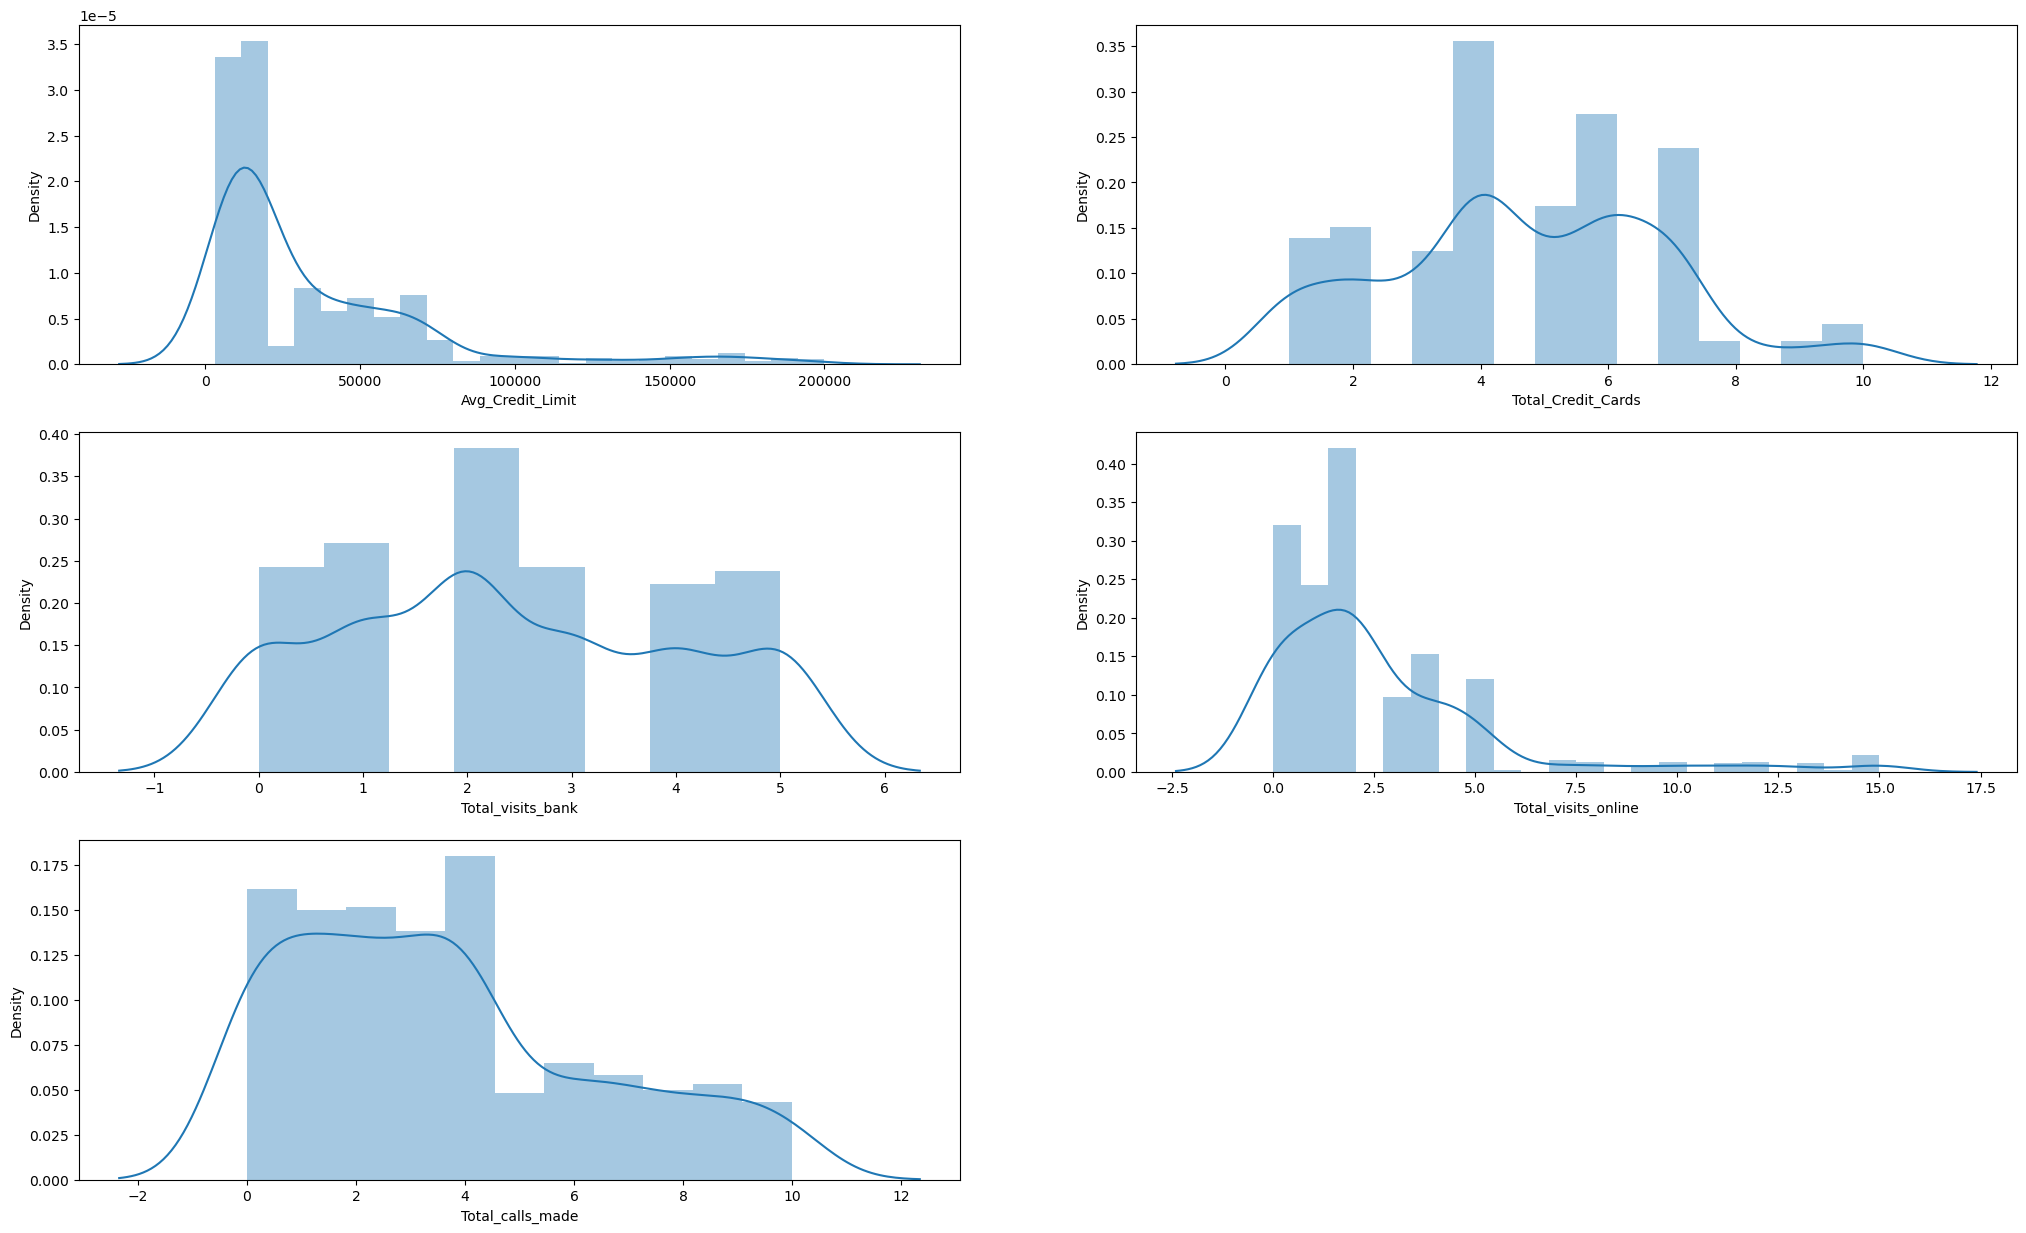

In [19]:
# and now we'll look at the above info in terms of percentages or density 
numcols = data.columns
fig, ax = plt.subplots(figsize=(25,15), dpi=100)
for i in range(0,len(numcols)):
    plt.subplot(3,2,i+1)
    sns.distplot(data[numcols[i]])
    plt.xlabel(numcols[i])

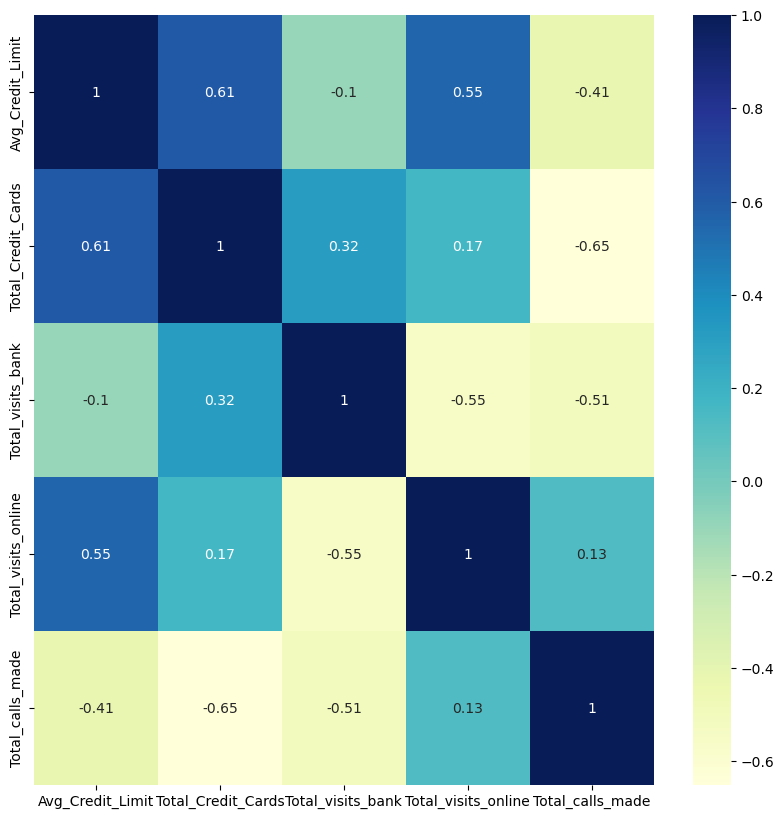

In [20]:
# let's perform bivariate analysis
plt.figure(figsize  = (10, 10))

sns.heatmap(data.corr(), annot = True, cmap = "YlGnBu")

plt.show()

**Observations:**<br>
- There are a significant number of outliers in credit limits
<br>
- There are some outliers in number of online visits
<br>
- Average credit limit and total visits online are heavily right skewed
<br>
- Total calls made is right skewed
<br>
- Number of credit cards, visits online, and total calls have multiple peaks
<br>
- Most customer have 4 credit cards
<br>
<br>
- Credit limits are positively correlated with number of cards (0.61) and online visits (0.55)
<br>
- Credit limits are negatively correlated with calls made (-0.41)
<br>
- Calls made are negatively correlated with bank visits (-0.51) and number of credit cards (-0.65)
<br>
- Online visits and bank visits are negatively correlated (-0.55d)

#### **Scaling the data**

In [21]:
# let's standarize our data
scaler = StandardScaler()

data_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

data_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [22]:
data_scaled_copy = data_scaled.copy(deep = True)

#### **Applying PCA on scaled data**

In [23]:
# let's define the number of pricipal components we wish to generate
n = data_scaled.shape[1]

# this will help us determine the principal component of the data 
pca1 = PCA(n_components = n, random_state = 1)
data_pca = pd.DataFrame(pca1.fit_transform(data_scaled))

# this will give us the percentage of variance captured by each principal component 
# The percentage of variance explained by each principal component
exp_var1 = pca1.explained_variance_ratio_

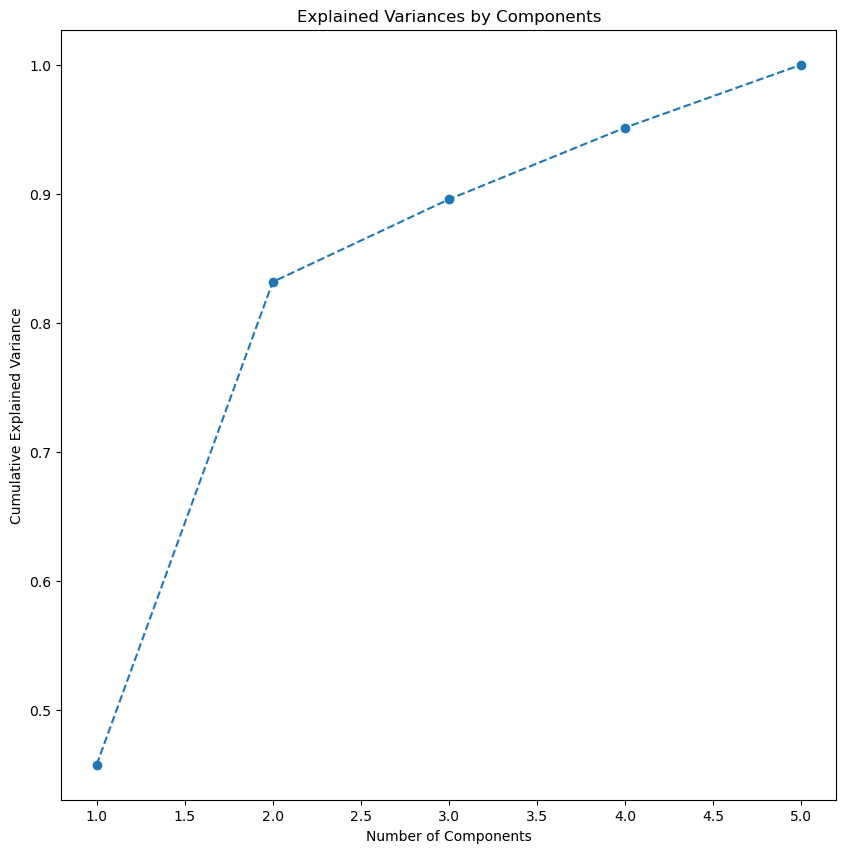

In [24]:
# let's generate a plot to visualize the data 
plt.figure(figsize = (10, 10))

plt.plot(range(1, 6), pca1.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

In [25]:
# this for loop will stop on the principle component that captures at least 70% of the data
sum = 0

for ix, i in enumerate(exp_var1):
    
    sum = sum + i
    
    if(sum>0.70):
        print("Number of PCs that explain at least 70% variance: ", ix + 1)
        break

Number of PCs that explain at least 70% variance:  2


In [26]:
# let's make a new dataframe with just the first 2 principal components
cols = ['PC1', 'PC2']

pc1 = pd.DataFrame(np.round(pca1.components_.T[:, 0:2], 2), index = data_scaled.columns, columns = cols)
pc1

,PC1,PC2
Avg_Credit_Limit,0.49,0.40
Total_Credit_Cards,0.60,0.03
Total_visits_bank,0.28,-0.59
Total_visits_online,0.11,0.67
Total_calls_made,-0.56,0.22


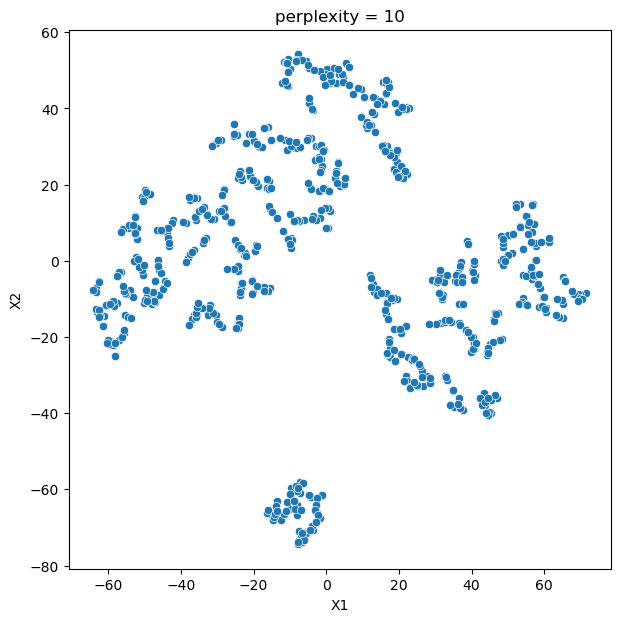

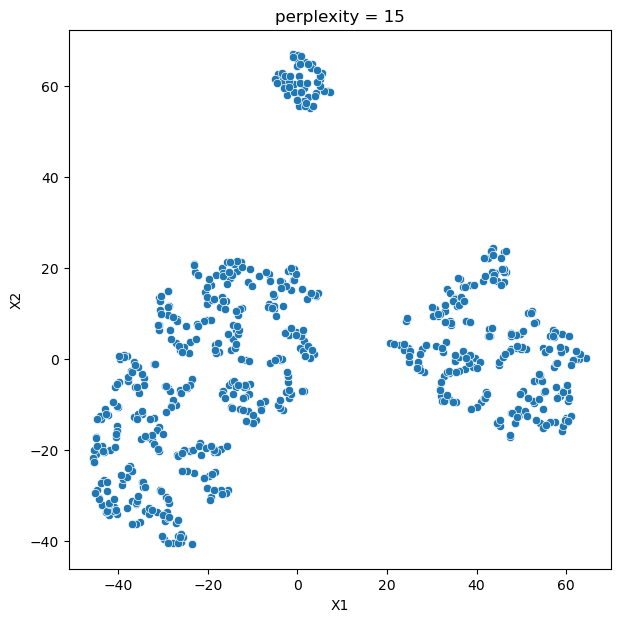

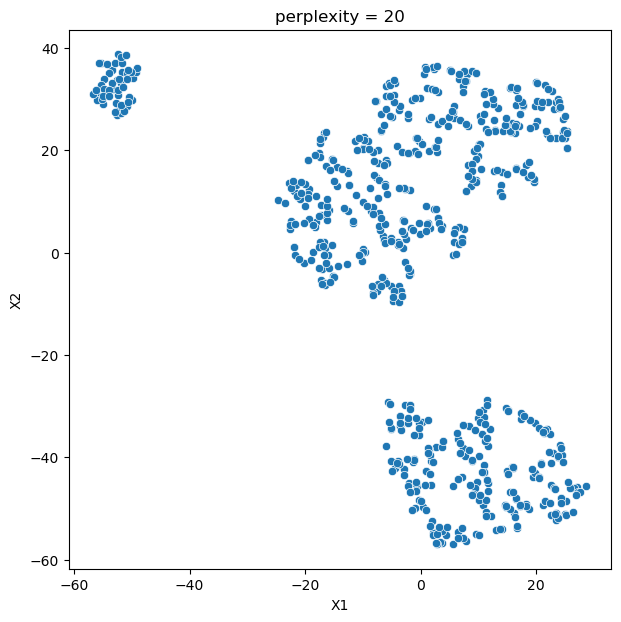

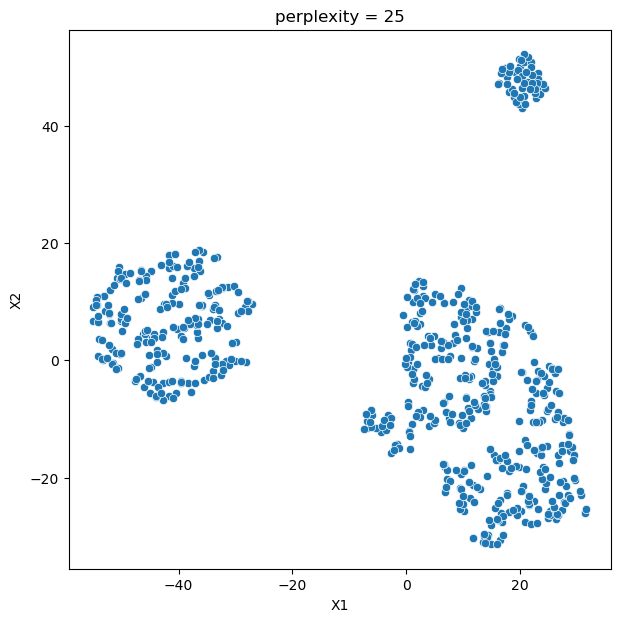

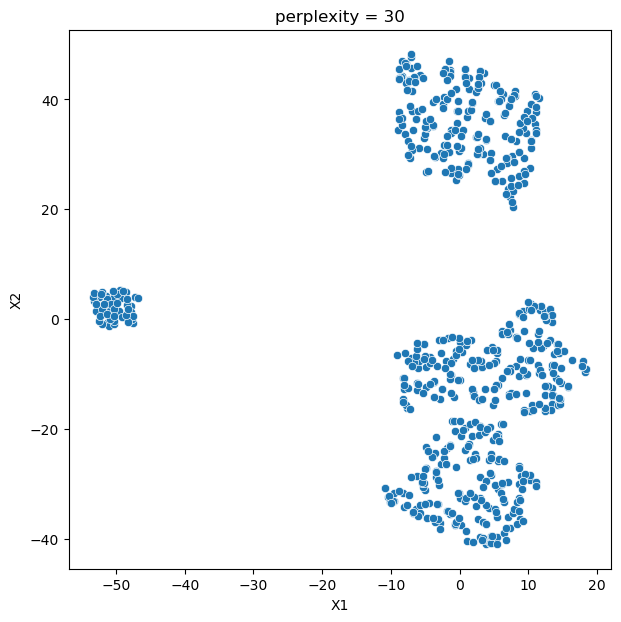

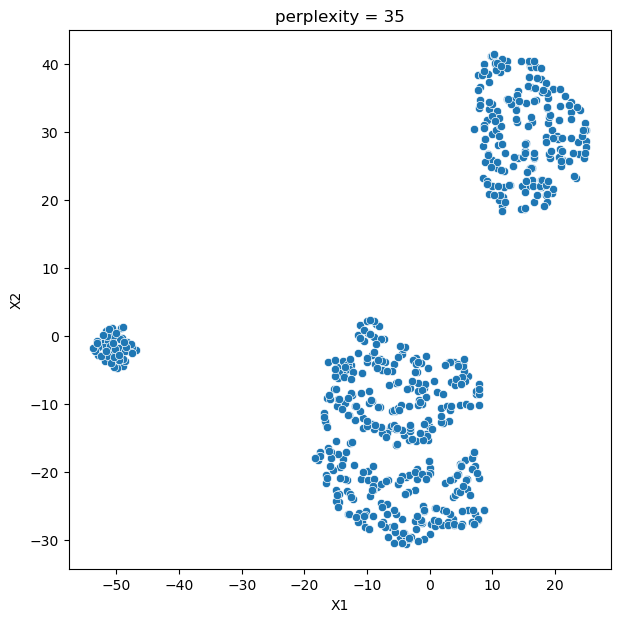

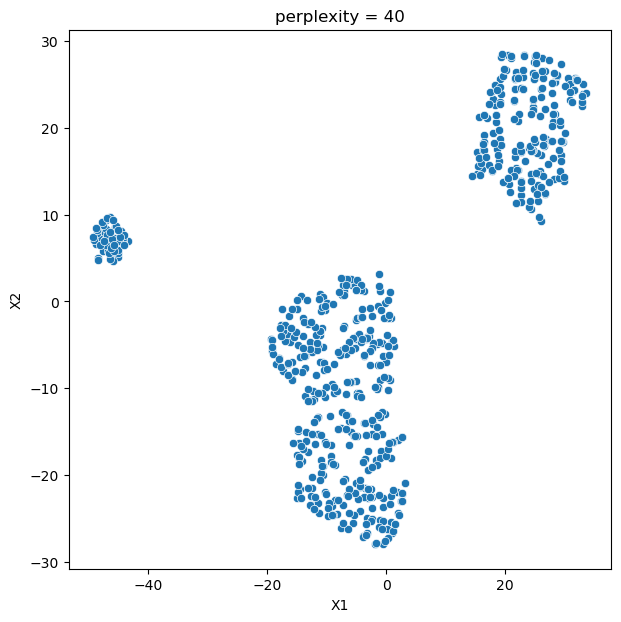

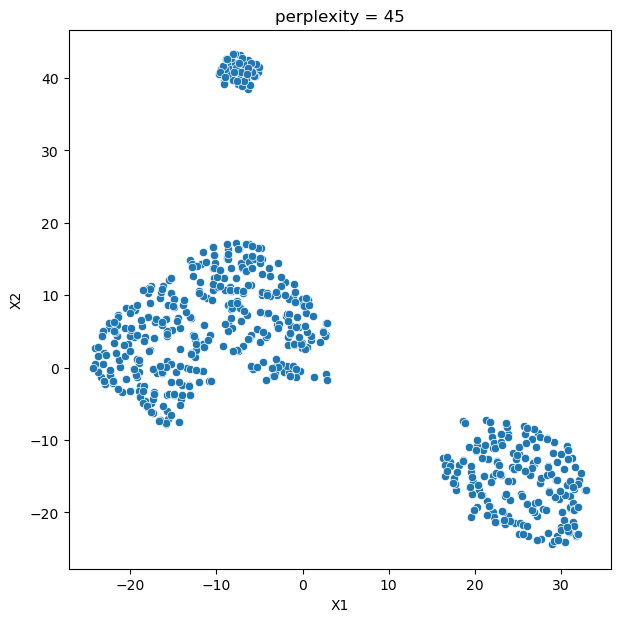

In [27]:
for i in range(10, 50, 5):
    tsne = TSNE(n_components = 2, random_state = 1, perplexity = i)
    
    data_tsne = tsne.fit_transform(data_scaled)
    
    data_tsne = pd.DataFrame(data_tsne)
    
    data_tsne.columns = ['X1', 'X2']
    
    plt.figure(figsize = (7,7))
    
    sns.scatterplot(x = 'X1', y = 'X2', data = data_tsne)
    
    plt.title("perplexity = {}".format(i))

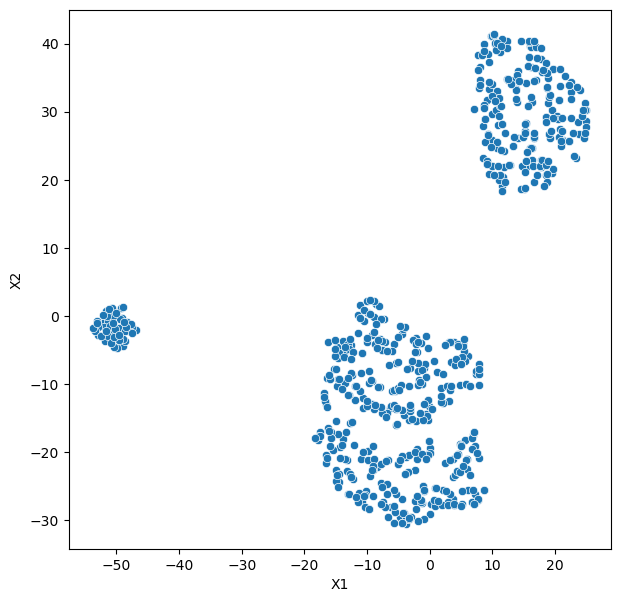

In [28]:
# Fitting t-SNE with number of components equal to 2
tsne = TSNE(n_components = 2, random_state = 1, perplexity = 35)

data_tsne = tsne.fit_transform(data_scaled)

# Converting the embeddings to a dataframe
data_tsne = pd.DataFrame(data_tsne, columns = ["X1", "X2"])

# Scatter plot for two components
plt.figure(figsize = (7, 7))

sns.scatterplot(x = 'X1', y = 'X2', data = data_tsne)

plt.show()

<AxesSubplot:xlabel='X1', ylabel='X2'>

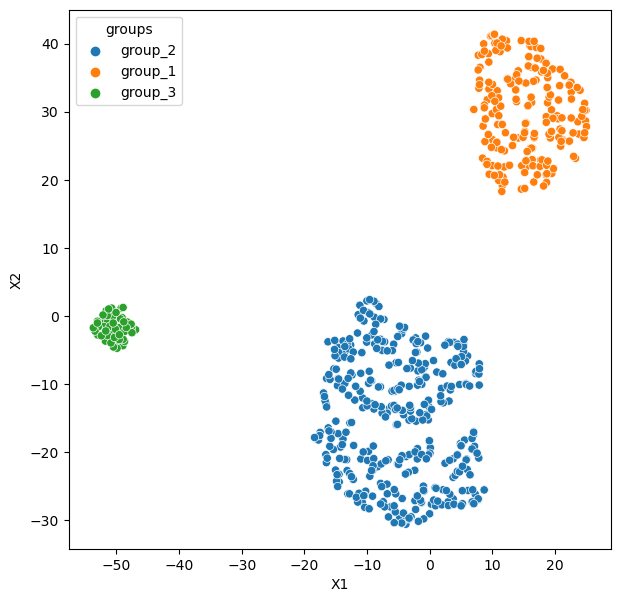

In [29]:
# let's assign 3 groups 
def grouping(x):
    first_component = x['X1']
    
    second_component = x['X2']
    
    if second_component > 3:
        return 'group_1'
    
    elif (second_component < 3) and (first_component > -19): 
        return 'group_2'
    
    else: 
        return 'group_3'
    

data_tsne['groups'] = data_tsne.apply(grouping, axis = 1)


# let's generate a color coated plot
plt.figure(figsize = (7, 7))

sns.scatterplot(x = 'X1', y = 'X2', data = data_tsne, hue = 'groups')

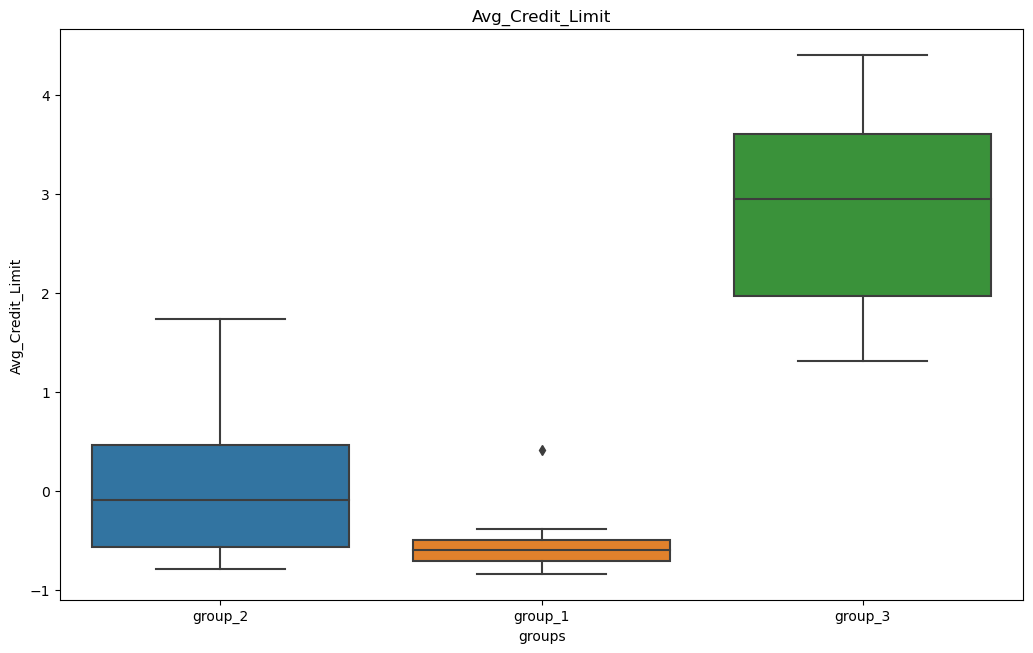

In [30]:
all_col = data_scaled.columns[:-4].tolist()

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(8, 3, i + 1)
    
    sns.boxplot(y=data_scaled[variable], x=data_tsne['groups'])
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

**Observations:**

- PC1 is strongly related to average credit limit and total number of credit cards and slightly related to total number of bank visits
- PC2 is strongly related to average credit limit, total number of bank visits, and total online visits and slightly related to total number of calls made

## **K-Means**

Let us now fit the K-means algorithm on our pca components and find out the optimum number of clusters to use.

We will do this in 3 steps:
1. Initialize a dictionary to store the Sum of Squared Error (SSE) for each K
2. Run for a range of Ks and store SSE for each run
3. Plot the SSE vs K and plot the elbow curve

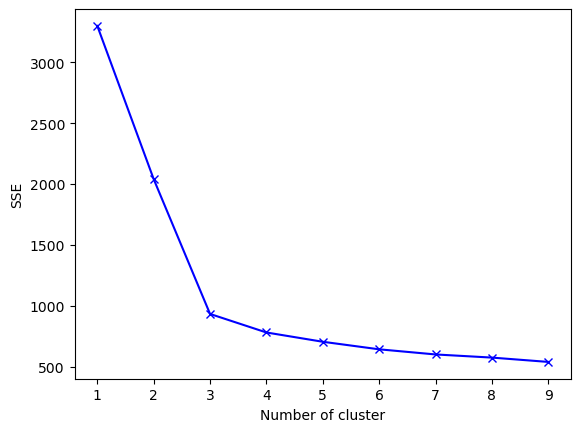

In [31]:
# let's create an empty dictionary where we'll store the SSE for each K-value
sse = {} 

# let's iterate a range of Ks and fit the scaled data to the algorithm
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state = 1).fit(data_scaled)
    
    sse[k] = kmeans.inertia_

# Elbow plot
plt.figure()

plt.plot(list(sse.keys()), list(sse.values()), 'bx-')

plt.xlabel("Number of cluster")

plt.ylabel("SSE")

plt.show()

**Observations:**

- We can see from the plot that there is a consistent dip from 1 to 3 and another from 3 to 9
- The elbow plot indicates that the ideal number of clusters is 3

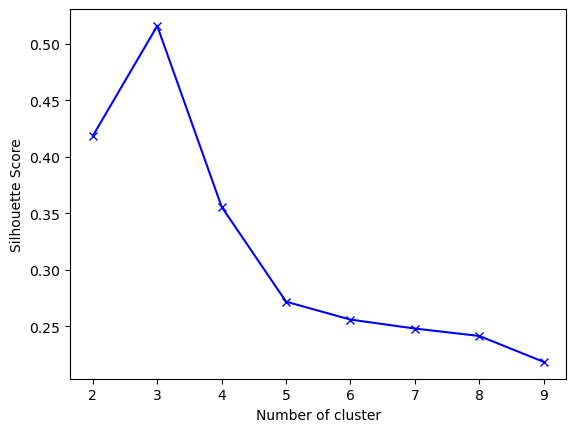

In [32]:
# let's create another empty dictionary where we'll store the Silhouette score of each K-value
sc = {} 

# let's iterate a range of Ks and fit the scaled data to the algorithm
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k, random_state = 1).fit(data_scaled)
    
    labels = kmeans.predict(data_scaled)
    
    sc[k] = silhouette_score(data_scaled, labels)

# let's create an elbow plot
plt.figure()

plt.plot(list(sc.keys()), list(sc.values()), 'bx-')

plt.xlabel("Number of cluster")

plt.ylabel("Silhouette Score")

plt.show()

**Observation:**

- We observe from the plot that the silhouette score is the highest for K=3, confirming that the ideal number of clusters is 3

In [33]:
kmeans = KMeans(n_clusters = 3, random_state = 1)

kmeans.fit(data_scaled)

data_scaled_copy['KMeans_Labels'] = kmeans.predict(data_scaled)

data['KMeans_Labels'] = kmeans.predict(data_scaled)

data['KMeans_Labels'].value_counts()

1    386
0    224
2     50
Name: KMeans_Labels, dtype: int64

**Observation:**

- The range of number of observations is large with one cluster only making 50 observations and another making 386

#### **Create the cluster profiles using the summary statistics and box plots for each label**

In [34]:
# let's calculate the mean and median o the original data for each label
mean = data.groupby('KMeans_Labels').mean()

median = data.groupby('KMeans_Labels').median()

df_kmeans = pd.concat([mean, median], axis = 0)

df_kmeans.index = ['Group 0 Mean', 'Group 1 Mean', 'Group 2 Mean', 'Group 0 Median', 'Group 1 Median', 'Group 2 Median']

df_kmeans

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Group 0 Mean,12174.107143,2.410714,0.933036,3.553571,6.870536
Group 1 Mean,33782.383420,5.515544,3.489637,0.981865,2.000000
Group 2 Mean,141040.000000,8.740000,0.600000,10.900000,1.080000
Group 0 Median,12000.000000,2.000000,1.000000,4.000000,7.000000
Group 1 Median,31000.000000,6.000000,3.000000,1.000000,2.000000
Group 2 Median,145500.000000,9.000000,1.000000,11.000000,1.000000


**Observations:**
- Group 0: Customers with low credit limit, fewer credit cards, medium bank visits, medium online visits, and most calls to bank 
- Group 1: Customers with medium credit limit, medium number of credit cards, highest average bank visits and fewest online visits and medium calls to bank
- Group 2: It includes cutomers with highest average credit limit, highest number of credit cards, least bank visits, most online visits, and fewest calls made to bank


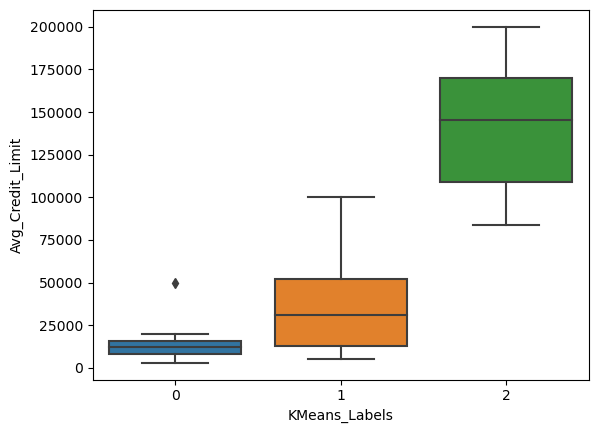

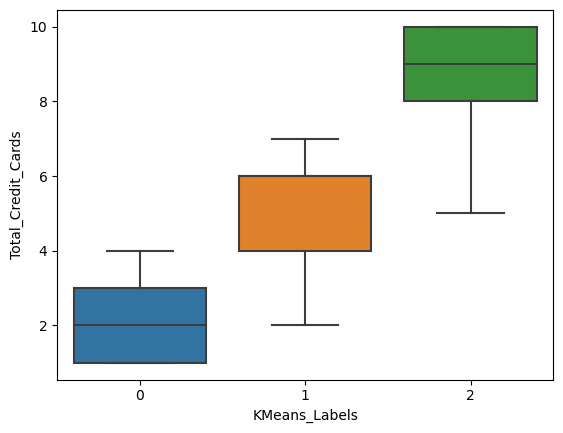

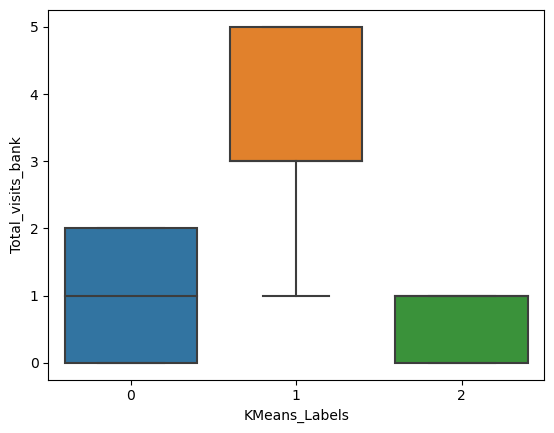

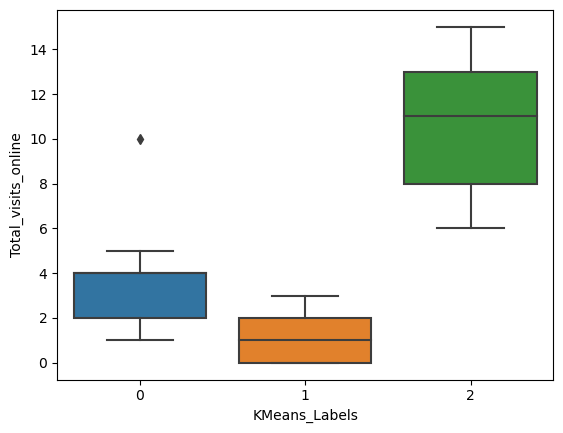

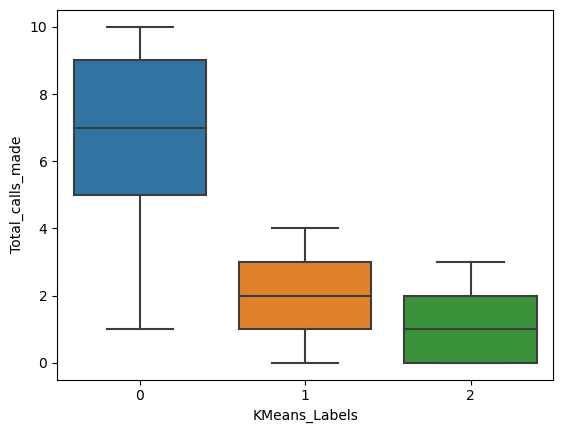

In [35]:
cols_visualise = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

for col in cols_visualise:
    sns.boxplot(x = 'KMeans_Labels', y = col, data = data)
    plt.show()

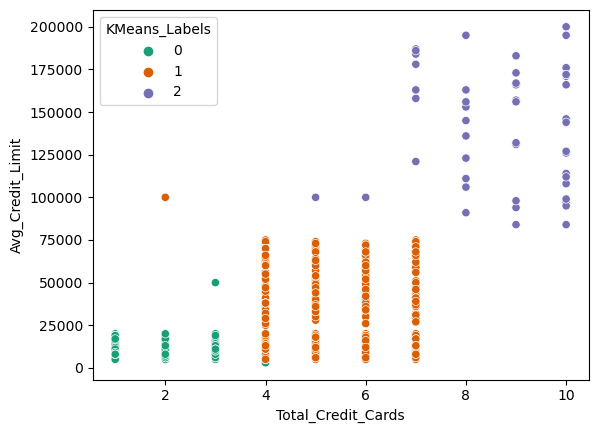

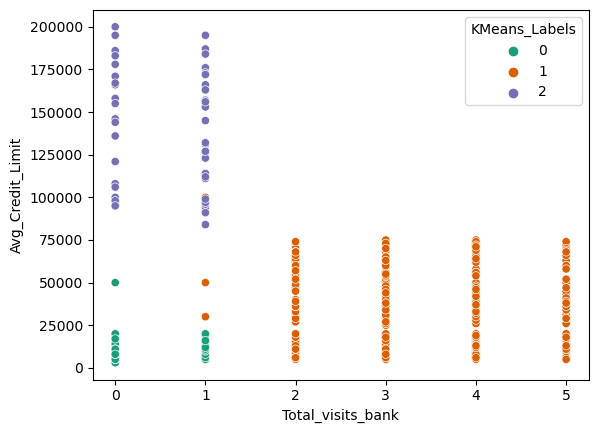

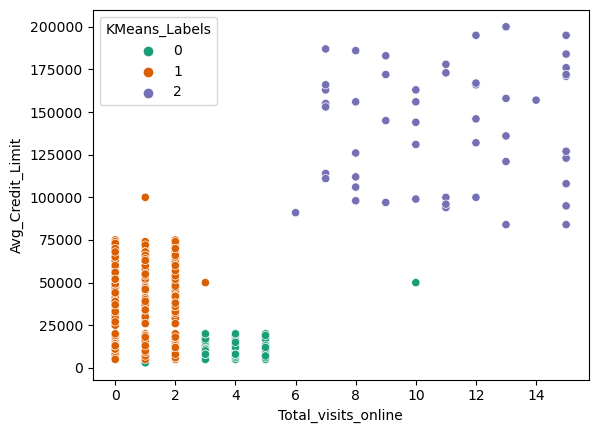

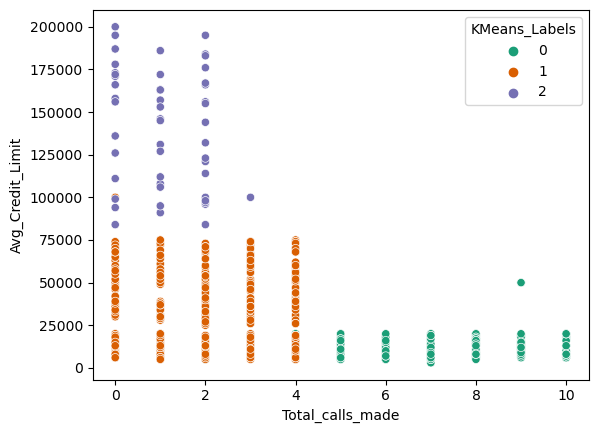

In [36]:
cols_visualise = ['Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

for col in cols_visualise:
    sns.scatterplot(x = col, y = 'Avg_Credit_Limit', data = data, hue = 'KMeans_Labels', palette = 'Dark2')
    
    plt.show()

## **Gaussian Mixture Model**

Let's now create clusters using the Gaussian Mixture Model.

- We will apply the Gaussian Mixture Model algorithm on the pca components

In [37]:
gmm = GaussianMixture(n_components = 3, random_state = 1)

gmm.fit(data_scaled)

data_scaled_copy['GmmLabels'] = gmm.predict(data_scaled)

data['GmmLabels'] = gmm.predict(data_scaled)

In [38]:
data.GmmLabels.value_counts()

1    386
0    224
2     50
Name: GmmLabels, dtype: int64

#### **Let's create the cluster profiles using the summary statistics and box plots for each label**


In [39]:
# let's calculate the mean and median of the original data for each label
original_features = ['Avg_Credit_Limit','Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

mean = data.groupby('GmmLabels').mean()

median = data.groupby('GmmLabels').median()

df_gmm = pd.concat([mean, median], axis = 0)

df_gmm.index = ['Group 0 Mean', 'Group 1 Mean', 'Group 2 Mean', 'Group 0 Median', 'Group 1 Median', 'Group 2 Median']

df_gmm[original_features]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Group 0 Mean,12174.107143,2.410714,0.933036,3.553571,6.870536
Group 1 Mean,33782.383420,5.515544,3.489637,0.981865,2.000000
Group 2 Mean,141040.000000,8.740000,0.600000,10.900000,1.080000
Group 0 Median,12000.000000,2.000000,1.000000,4.000000,7.000000
Group 1 Median,31000.000000,6.000000,3.000000,1.000000,2.000000
Group 2 Median,145500.000000,9.000000,1.000000,11.000000,1.000000


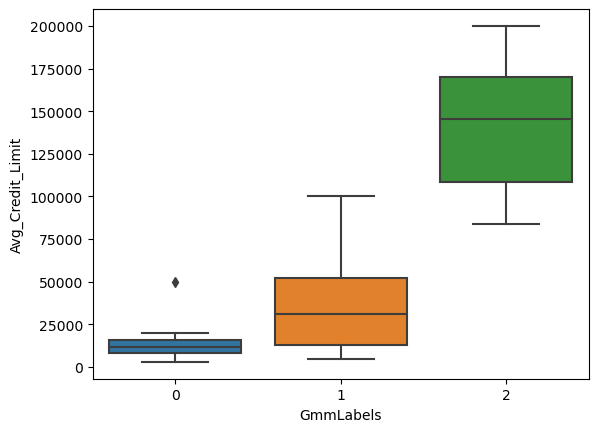

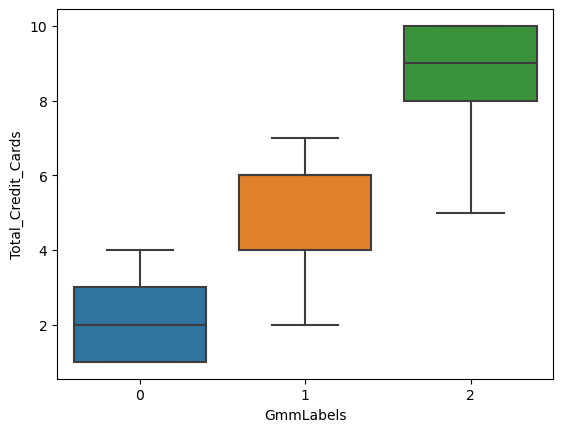

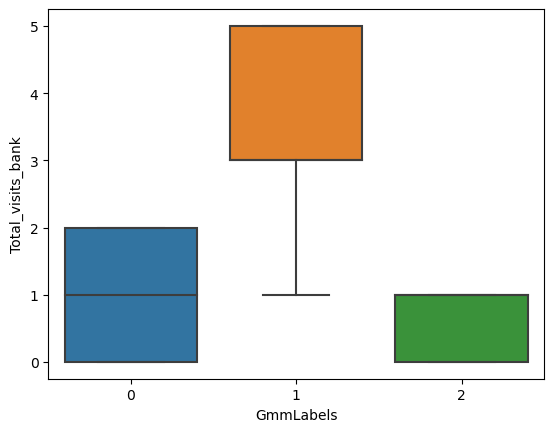

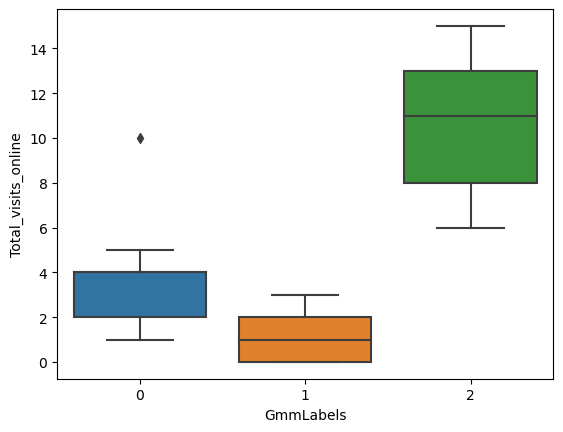

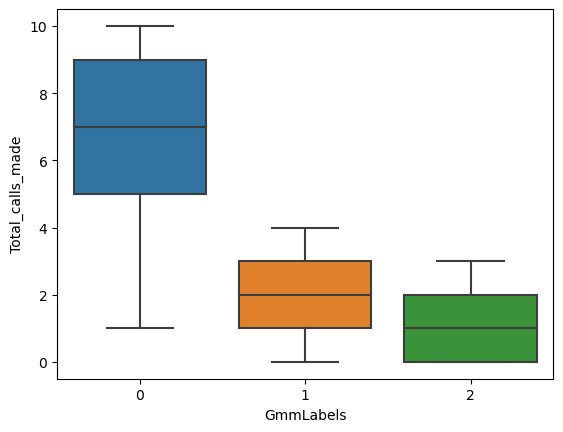

In [40]:
cols_visualise = ['Avg_Credit_Limit','Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

for col in cols_visualise:
    sns.boxplot(x = 'GmmLabels', y = col, data = data)
    
    plt.show()

**Observations** <br>
- The GMM and KMM yielded very similar results, confirming that the two are true representations of the data

## **K-Medoids**



- Let's apply the K-Medoids clustering algorithm on the pca components

In [41]:
kmedo = KMedoids(n_clusters = 3, random_state = 1)

kmedo.fit(data_scaled)

data_scaled_copy['kmedoLabels'] = kmedo.predict(data_scaled)

data['kmedoLabels'] = kmedo.predict(data_scaled)

data.kmedoLabels.value_counts()

2    280
0    224
1    156
Name: kmedoLabels, dtype: int64

In [42]:
# let's calculate the mean and median of the original data for each label
original_features = ['Avg_Credit_Limit','Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

mean = data.groupby('kmedoLabels').mean()

median = data.groupby('kmedoLabels').median()

df_kmedoids = pd.concat([mean, median], axis = 0)

df_kmedoids.index = ['Group 0 Mean', 'Group 1 Mean', 'Group 2 Mean', 'Group 0 Median', 'Group 1 Median', 'Group 2 Median']

df_kmedoids[original_features]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Group 0 Mean,12138.392857,2.419643,0.941964,3.558036,6.883929
Group 1 Mean,80621.794872,6.730769,1.801282,4.166667,2.006410
Group 2 Mean,26867.857143,5.407143,3.907143,0.975000,1.821429
Group 0 Median,11500.000000,2.000000,1.000000,4.000000,7.000000
Group 1 Median,66000.000000,7.000000,2.000000,2.000000,2.000000
Group 2 Median,19000.000000,6.000000,4.000000,1.000000,2.000000


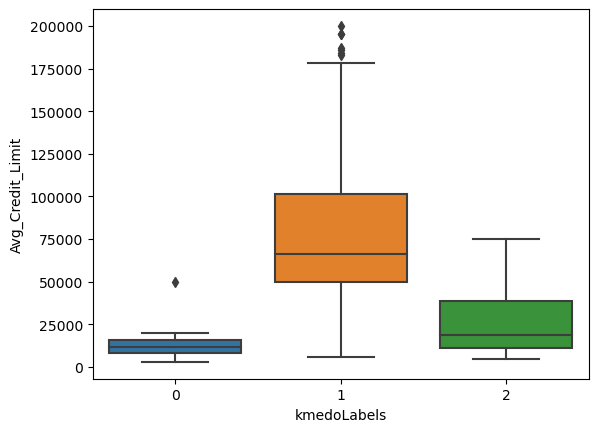

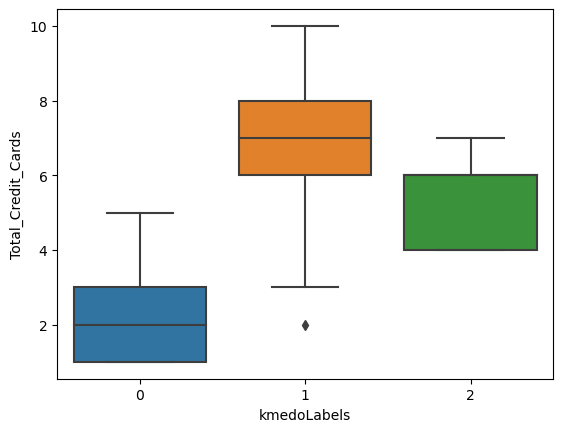

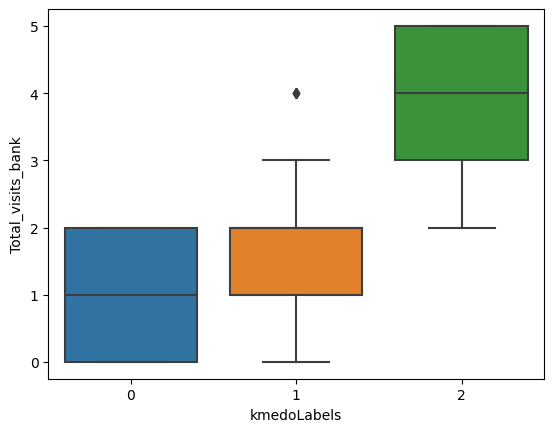

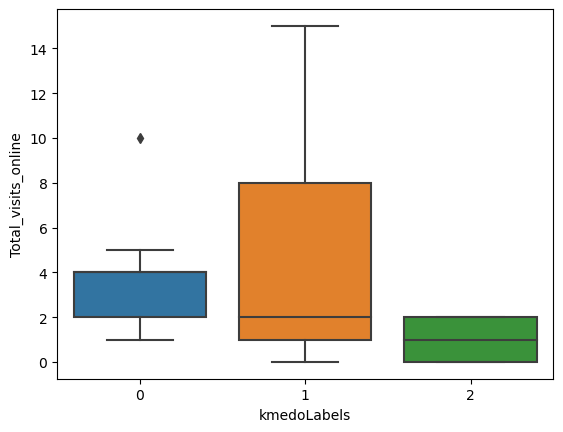

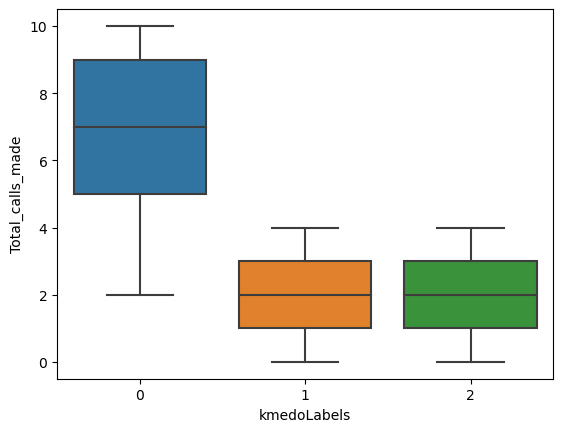

In [43]:
for col in cols_visualise:
    sns.boxplot(x = 'kmedoLabels', y = col, data = data)
    
    plt.show()

## **Conclusions and Business Recommendations**

Three distinct types of customers exist<br>
The distinguishing factor is credit limit:<br>
- **Group 1:** High credit limit and preference to bank online<br>
- **Group 2:** Medium credit limit and preference to visit banks<br>
- **Group 3:** Low credit limit with and preference to call bank

Customers with high credit limits may spend more as indictated by their high number of credit cards and preference for the more convenient online banking
<br>
Customers with low credit limits have fewer credit cards and prefer calling the bank 
<br>
Customers with medium credit limits have more credit cards than those with low credit limits and fewer than those with high credit limits
<br><br>
I advise tailoring contact methods to these customer groups based on their prefered method:
- Customers with high credit limits tend to visit online, making online marketing an ideal method of marketing
- Customers with lower credit limits tend to visit banks which creates opportunities to upsell in-person
- Since customers with low credit limits are not very active online, I advise a campaign encouraging online banking amongst this group of customers 

Furthermore, since online users tend to have (and presumably use) the most credit, these may be the demographic we want to target with our next ad campaign.